# LSTM+XGBoost Model 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from pathlib import Path

/home/Shamith/anaconda3/envs/DWG-Crypto/lib/python3.11/site-packages/xgboost/core.py:377: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc >= 2.28) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(


Find and import parquet files

In [2]:
current_dir = Path.cwd()
parent_dir  = current_dir.parent

file_path   = parent_dir.parent / 'train.parquet'
print(file_path)

df = pd.read_parquet(file_path)
df.head()

/mnt/windows/ProgrammingStuff/Projects/DRW-Crypto-Kaggle/train.parquet


,bid_qty,ask_qty,buy_qty,sell_qty,volume,X1,X2,X3,X4,X5,...,X882,X883,X884,X885,X886,X887,X888,X889,X890,label
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-03-01 00:00:00,15.283,8.425,176.405,44.984,221.389,0.121263,-0.417690,0.005399,0.125948,0.058359,...,1.925423,1.847943,0.005676,0.190791,0.369691,0.377630,0.210153,0.159183,0.530636,0.562539
2023-03-01 00:01:00,38.590,2.336,525.846,321.950,847.796,0.302841,-0.049576,0.356667,0.481087,0.237954,...,1.928569,1.849468,0.005227,0.184660,0.363642,0.374515,0.209573,0.158963,0.530269,0.533686
2023-03-01 00:02:00,0.442,60.250,159.227,136.369,295.596,0.167462,-0.291212,0.083138,0.206881,0.101727,...,1.928047,1.849282,0.004796,0.178719,0.357689,0.371424,0.208993,0.158744,0.529901,0.546505
2023-03-01 00:03:00,4.865,21.016,335.742,124.963,460.705,0.072944,-0.436590,-0.102483,0.017551,0.007149,...,1.928621,1.849608,0.004398,0.172967,0.351832,0.368358,0.208416,0.158524,0.529534,0.357703
2023-03-01 00:04:00,27.158,3.451,98.411,44.407,142.818,0.173820,-0.213489,0.096067,0.215709,0.107133,...,1.927084,1.848950,0.004008,0.167391,0.346066,0.365314,0.207839,0.158304,0.529167,0.362452


<Axes: title={'center': 'volume over time'}, xlabel='timestamp', ylabel='volume'>

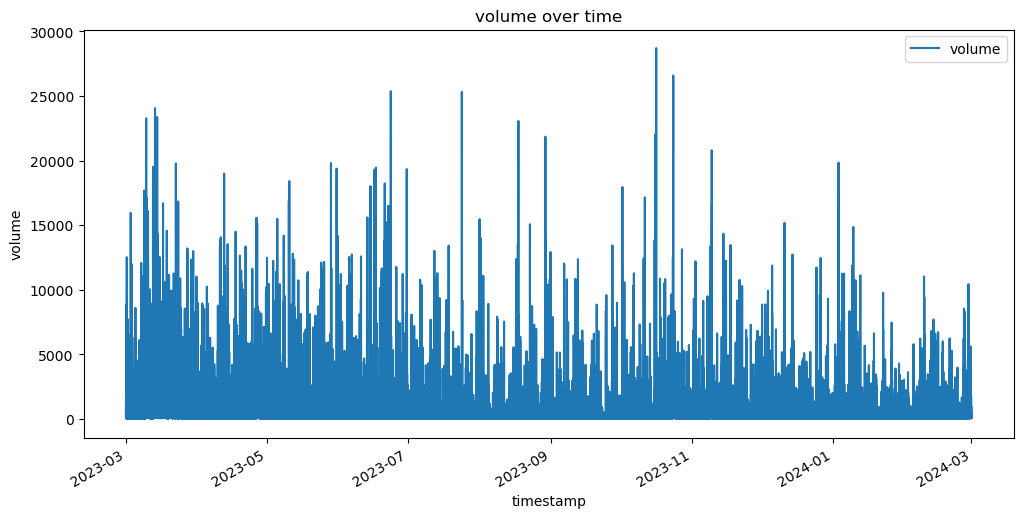

In [3]:
df[['volume']].plot(
    figsize=(12,6),
    title="volume over time",
    xlabel="timestamp",
    ylabel="volume",
)


<Axes: xlabel='timestamp'>

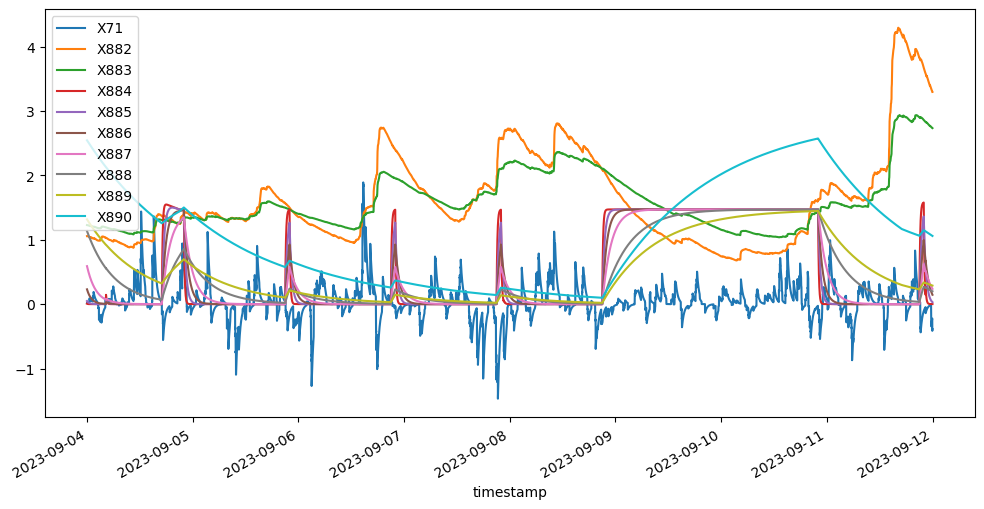

In [4]:
# a week of data starting from the first monday of september 2023 to the next
df[['X71','X882', 'X883', 'X884', 'X885', 'X886', 'X887', 'X888', 'X889', 'X890']].loc[(df.index > '09-04-2023') & (df.index < '09-12-2023')].plot(
    figsize=(12,6),
    
)

<Axes: xlabel='timestamp'>

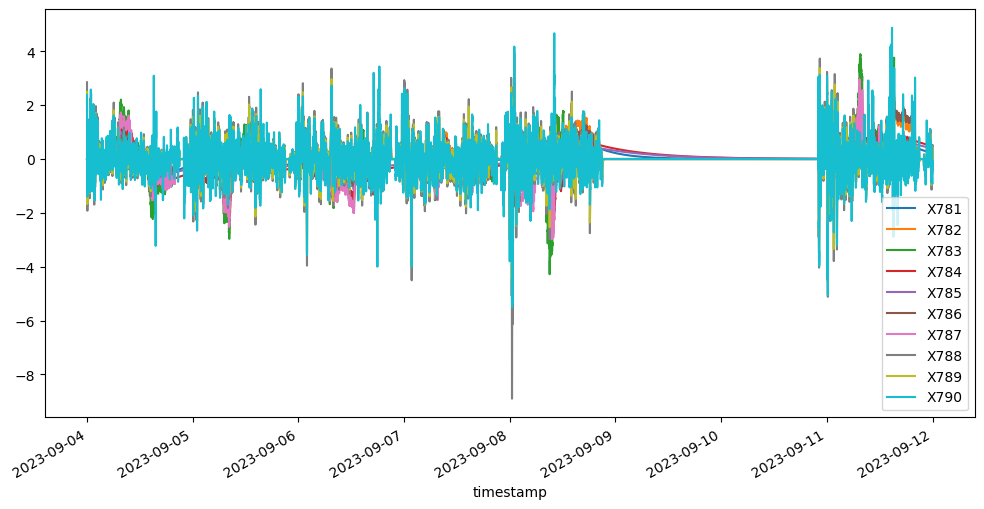

In [5]:
df[['X781','X782', 'X783', 'X784', 'X785', 'X786', 'X787', 'X788', 'X789', 'X790']].loc[(df.index > '09-04-2023') & (df.index < '09-12-2023')].plot(
    figsize=(12,6),
    
)

<Axes: xlabel='timestamp'>

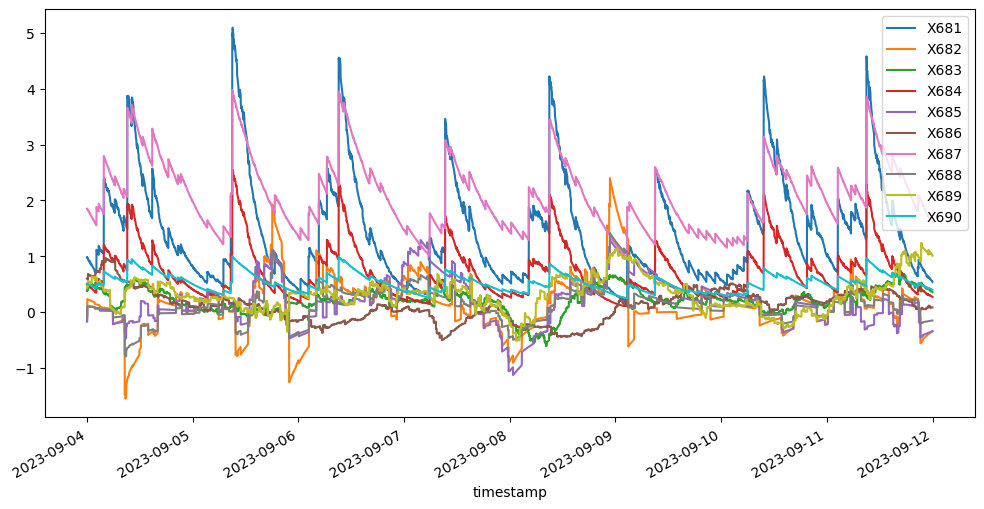

In [6]:
df[['X681','X682', 'X683', 'X684', 'X685', 'X686', 'X687', 'X688', 'X689', 'X690']].loc[(df.index > '09-04-2023') & (df.index < '09-12-2023')].plot(
    figsize=(12,6),
    
)

# Create XGBoost Model

In [7]:
df.columns

Index(['bid_qty', 'ask_qty', 'buy_qty', 'sell_qty', 'volume', 'X1', 'X2', 'X3',
       'X4', 'X5',
       ...
       'X882', 'X883', 'X884', 'X885', 'X886', 'X887', 'X888', 'X889', 'X890',
       'label'],
      dtype='object', length=896)

In [8]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit()

TypeError: XGBModel.fit() missing 2 required positional arguments: 'X' and 'y'